### Libraries ###
***
---

In [44]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")
from DateTime import DateTime

### Reading the data ###
***
---

In [45]:
df = pd.read_csv("/Users/me/Desktop/ML_Forecast_Time_Series/src/data/oil and gas stock prices.csv")


### Selection of Data ##
***
---

In [46]:
df= df.loc[df.Symbol=="XOM"]


### Passing the information to DateTime ###
***
---

In [47]:
df["Date"] = pd.to_datetime(df["Date"])

In [48]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD


In [49]:
df = df.set_index("Date")

### Getting the frequency to Daily ###
***
---

In [50]:
freq = pd.infer_freq(df.index)

# set the frequency of the DatetimeIndex
df.index.freq = freq

# resample the time series to a new frequency
ts_resampled =df.asfreq('D')

print(ts_resampled)

           Symbol    Open    High     Low   Close      Volume Currency
Date                                                                  
2000-01-03    XOM   39.75   40.38   38.94   39.16  13458200.0      USD
2000-01-04    XOM   38.69   39.09   38.25   38.41  14510800.0      USD
2000-01-05    XOM   39.00   40.88   38.91   40.50  17485000.0      USD
2000-01-06    XOM   40.31   42.91   40.09   42.59  19462000.0      USD
2000-01-07    XOM   42.97   43.12   42.00   42.47  16603800.0      USD
...           ...     ...     ...     ...     ...         ...      ...
2022-06-06    XOM   99.18   99.78   98.67   98.84  20682050.0      USD
2022-06-07    XOM   99.70  103.43   99.49  103.37  36994384.0      USD
2022-06-08    XOM  103.49  105.57  102.98  104.59  31442508.0      USD
2022-06-09    XOM  103.42  104.57  102.16  102.33  26417288.0      USD
2022-06-10    XOM  101.94  103.35   99.79  100.46  30764130.0      USD

[8195 rows x 7 columns]


In [51]:
ts_resampled.head(10)

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400.0,USD
2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600.0,USD


In [52]:
ts_resampled = ts_resampled.fillna(method='ffill')


In [53]:
ts_resampled.head(15)

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-08,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-09,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400.0,USD
2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600.0,USD


In [54]:
df= ts_resampled.copy()

### Renaming the Close column to Value columns ###
***
---

In [55]:
df= df[["Close"]].copy()
df.rename(columns={"Close":"Value"},inplace=True)


### Plotting the data ###
***
---

In [56]:
fig= px.line(df, x=df.index, y="Value", title="Exxon Mobile")
fig.show()

count    8195.000000
mean       67.955834
std        19.417915
min        30.270000
25%        48.260000
50%        72.130000
75%        84.025000
max       104.590000
Name: Value, dtype: float64

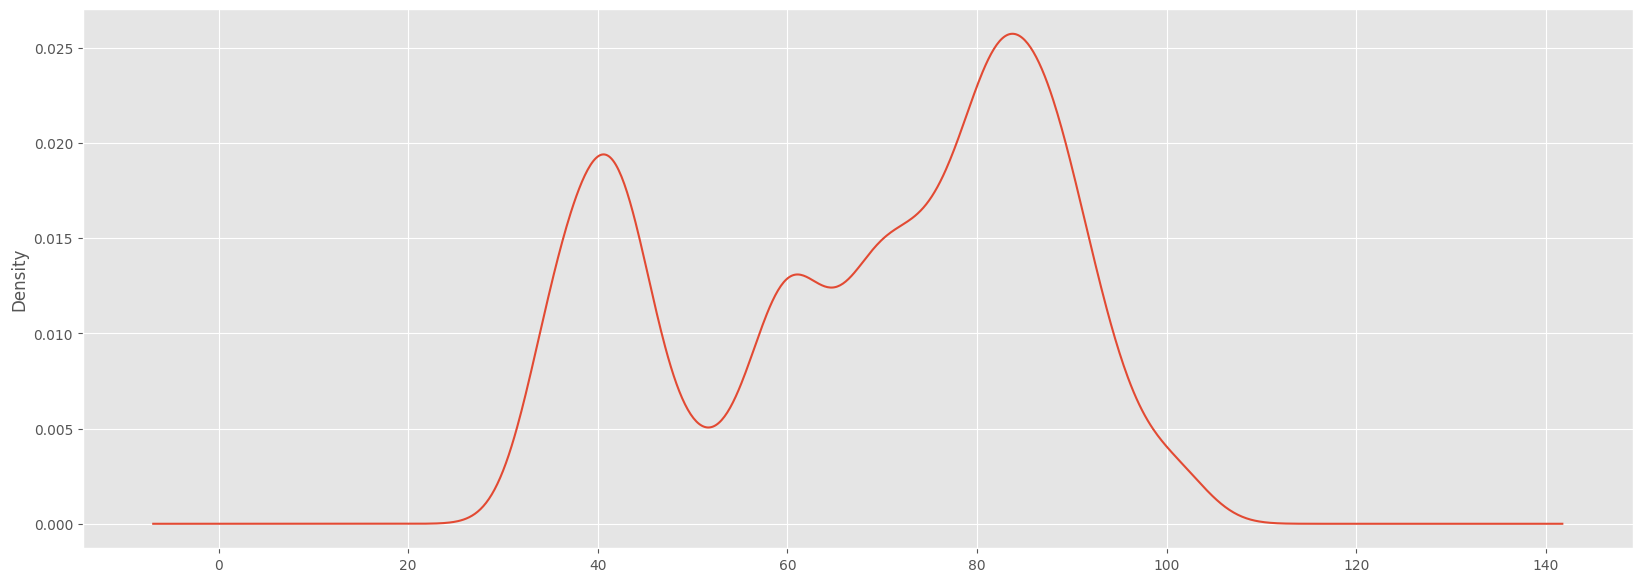

In [57]:
df["Value"].plot(kind="kde",figsize=(20,7))
df["Value"].describe()

### Rolling Mean ###
***
---

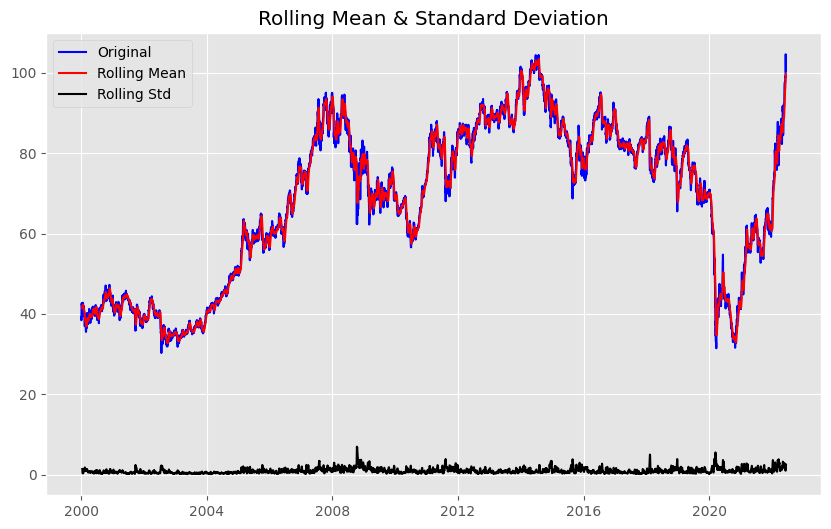

ADF Statistic: -1.5758026693553016
p-value: 0.49573618189725904
Critical Values: {'1%': -3.431149187783793, '5%': -2.861893184836333, '10%': -2.5669579955025976}
The data is non-stationary


In [58]:
# Define a function to test for stationarity
def test_stationarity(data):
    # Calculate the rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot the rolling statistics
    plt.figure(figsize=(10,6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(data['Value'])
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])
    
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is non-stationary')
    
# Call the function to test for stationarity
test_stationarity(df)


### Passing the Data to Stationary ###
***
---

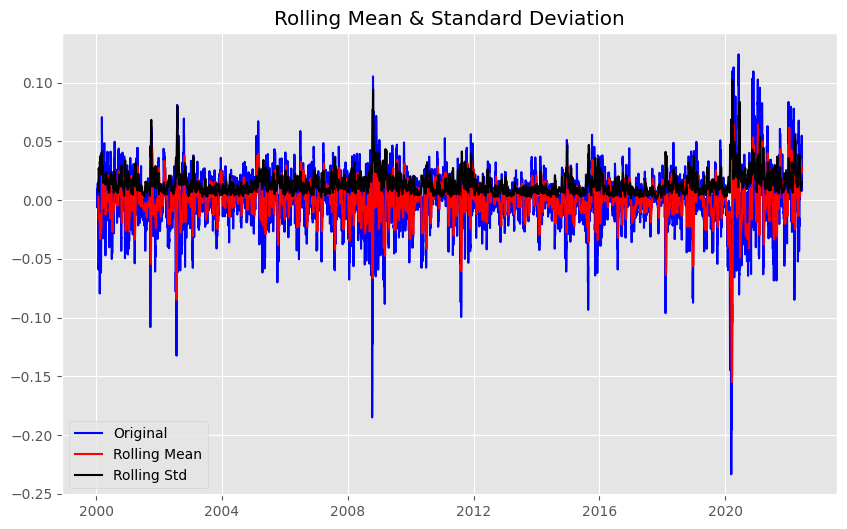

ADF Statistic: -16.386032555597318
p-value: 2.722539232759746e-29
Critical Values: {'1%': -3.431151833636392, '5%': -2.8618943539594732, '10%': -2.5669586178382677}
The data is stationary


In [59]:
# Apply log transformation to the data
df_log = np.log(df)

# Calculate the moving average and standard deviation
moving_avg = df_log.rolling(window=12).mean()
moving_std = df_log.rolling(window=12).std()

# Subtract the moving average from the data
df_log_minus_moving_avg = df_log - moving_avg

# Drop the null values
df_log_minus_moving_avg.dropna(inplace=True)

# Test for stationarity
test_stationarity(df_log_minus_moving_avg)


In [60]:
df_log_minus_moving_avg

,Value
Date,
2000-01-14,0.009063
2000-01-15,0.003467
2000-01-16,-0.003740
2000-01-17,-0.006533
2000-01-18,0.005748
...,...
2022-06-06,0.009756
2022-06-07,0.048958
2022-06-08,0.054919


In [61]:
df = df_log_minus_moving_avg.copy()

In [62]:
df.head()

,Value
Date,
2000-01-14,0.009063
2000-01-15,0.003467
2000-01-16,-0.003740
2000-01-17,-0.006533
2000-01-18,0.005748


In [63]:
def Prueba_Dickey_Fuller(series):
    
    print (f"Resultados de la prueba de Dickey-Fuller")
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        StopIteration

In [64]:
Prueba_Dickey_Fuller(df)

Resultados de la prueba de Dickey-Fuller
Test Statistic                       -1.638603e+01
p-value                               2.722539e-29
No Lags Used                          2.500000e+01
Número de observaciones utilizadas    8.158000e+03
Critical Value (1%)                  -3.431152e+00
Critical Value (5%)                  -2.861894e+00
Critical Value (10%)                 -2.566959e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [65]:
freq = pd.infer_freq(df.index)

print(freq)

D


### Plotting the Data ###
***
---

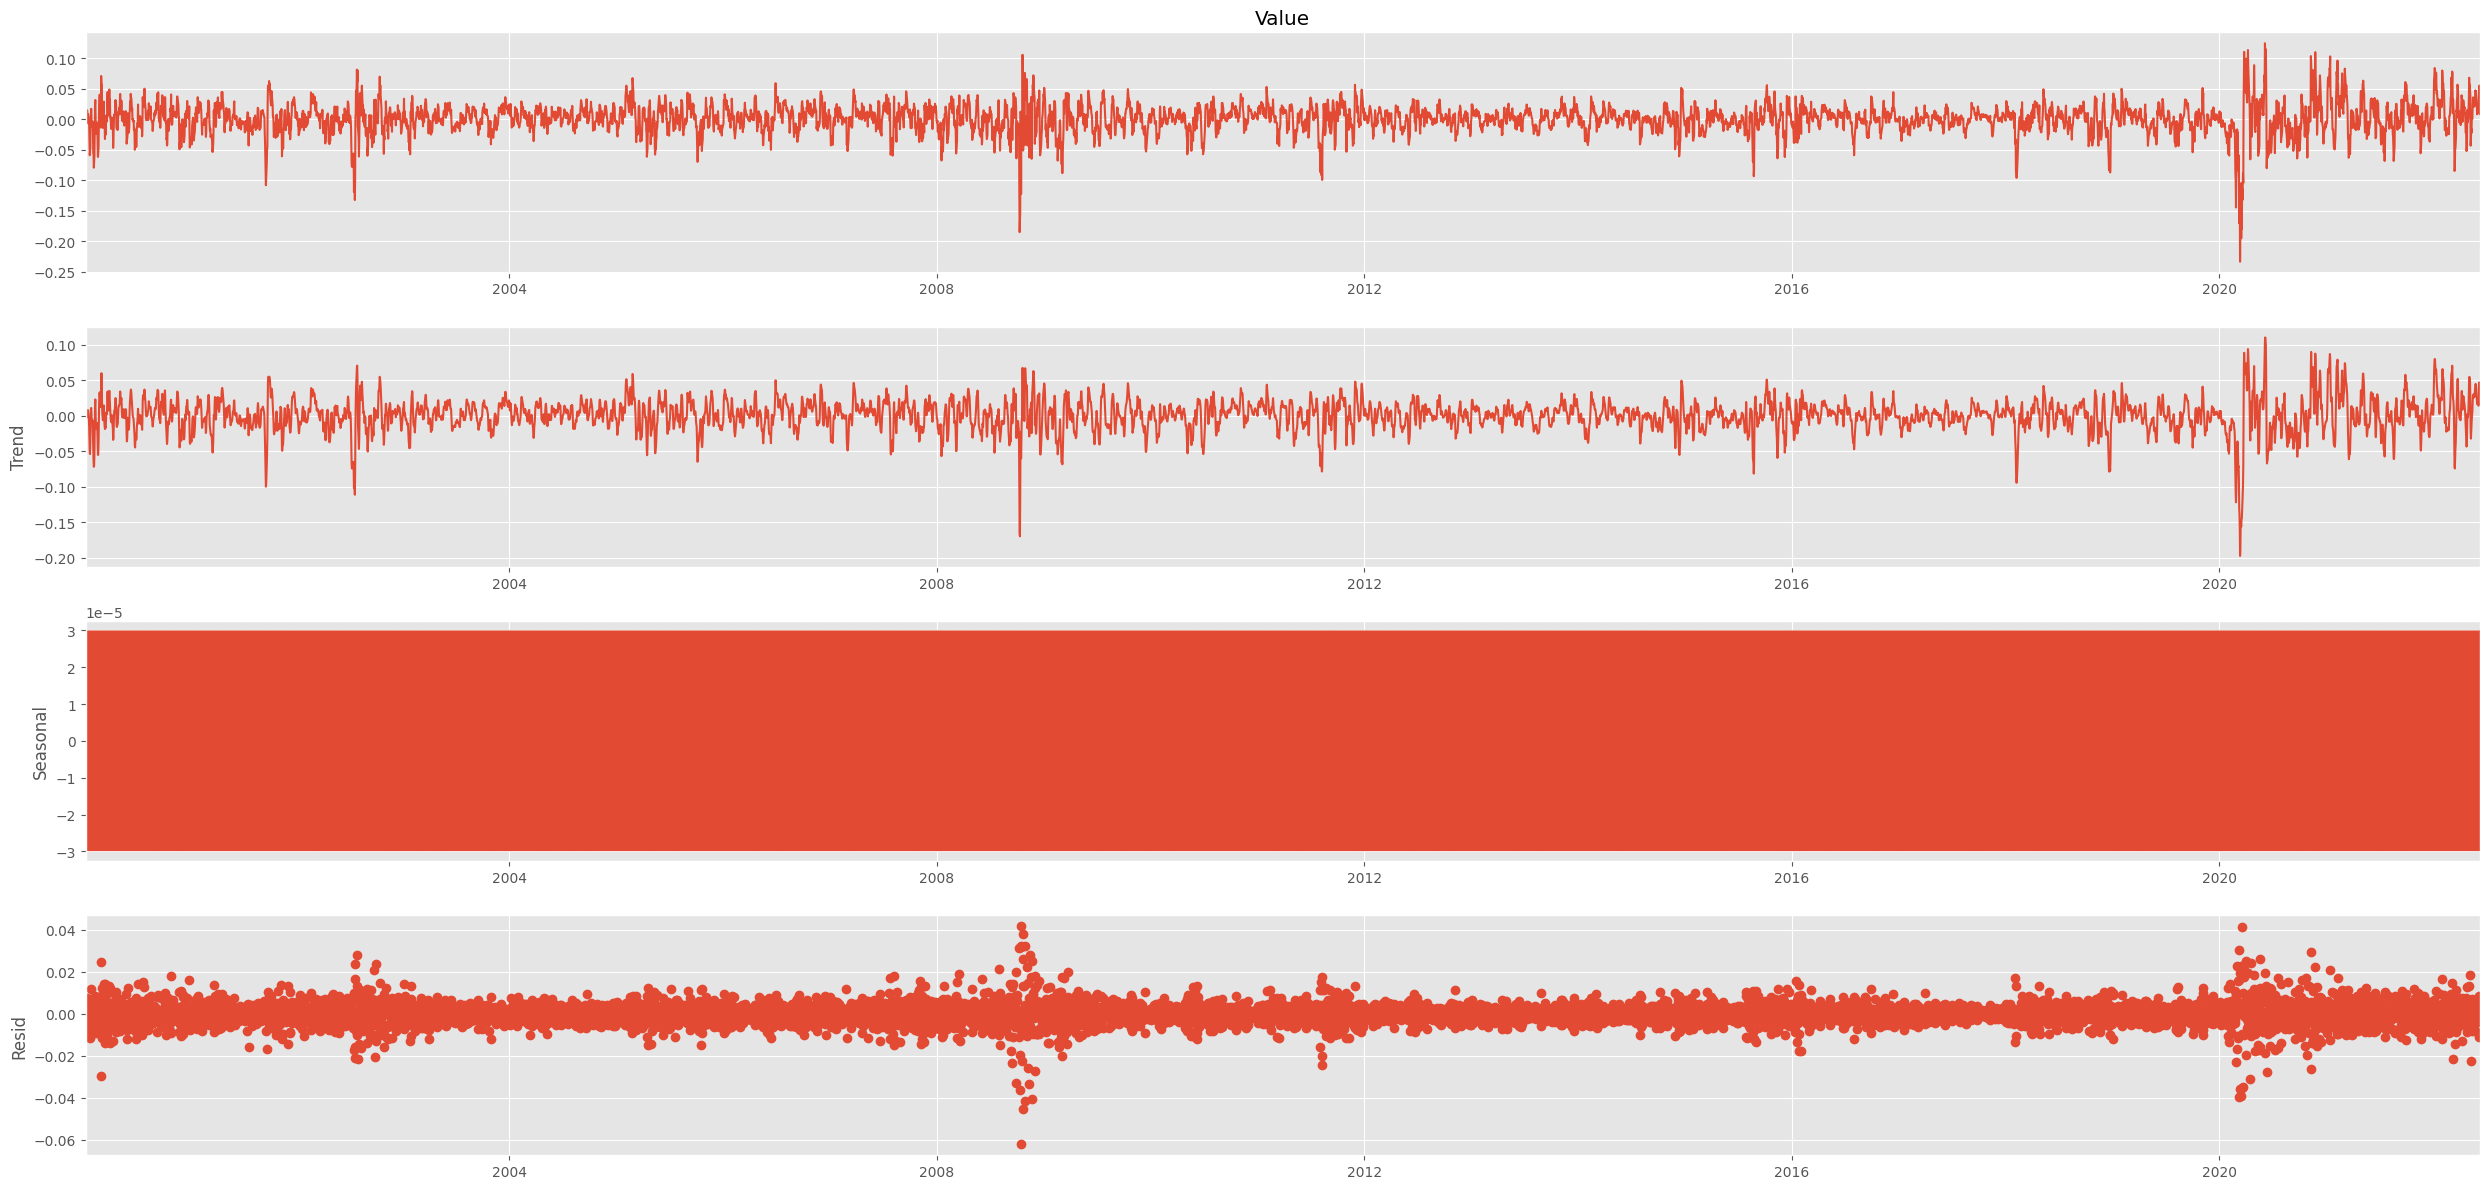

In [66]:
plt.rcParams["figure.figsize"] = (25, 12)
a = seasonal_decompose(df["Value"], model ="additive",period=2)
a.plot();

In [68]:
Prueba_Dickey_Fuller(df[["Value"]])

Resultados de la prueba de Dickey-Fuller
Test Statistic                       -1.638603e+01
p-value                               2.722539e-29
No Lags Used                          2.500000e+01
Número de observaciones utilizadas    8.158000e+03
Critical Value (1%)                  -3.431152e+00
Critical Value (5%)                  -2.861894e+00
Critical Value (10%)                 -2.566959e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


### Divison en Train y Test ###
***
---

In [69]:
df.shape

(8184, 1)

In [70]:
train_data = df[:6552]
test_data = df[6552:]
test=test_data.copy()



In [71]:
test_data.head()

,Value
Date,
2017-12-22,0.010658
2017-12-23,0.009719
2017-12-24,0.008510
2017-12-25,0.007662
2017-12-26,0.006703


In [72]:
from pmdarima import auto_arima   



In [73]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-34843.375, Time=1.65 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-36517.495, Time=2.92 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=22.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-34857.955, Time=0.58 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-37319.681, Time=10.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=23.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=32.34 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-37278.487, Time=5.99 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-37326.961, Time=17.14 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-36525.523, Time=5.24 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=38.31 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=21.39 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-37325.141, Time=15.05 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-37321.510, Time=9.91 sec
 ARIMA(1,1,1)(2,1,

In [74]:
print(modelo_auto.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 6552
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               18668.481
Date:                            Sun, 30 Apr 2023   AIC                         -37326.961
Time:                                    15:32:49   BIC                         -37293.034
Sample:                                01-14-2000   HQIC                        -37315.230
                                     - 12-21-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0846      0.007    -12.728      0.000      -0.098      -0.072
ar.L2         -0.0375      0.006   

In [75]:
arima_model = SARIMAX(train_data, order = (2,1,0), seasonal_order = (2,1,0,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81717D+00    |proj g|=  1.86742D+01

At iterate    5    f= -2.84865D+00    |proj g|=  3.17782D-02

At iterate   10    f= -2.84894D+00    |proj g|=  1.75195D+00

At iterate   15    f= -2.84928D+00    |proj g|=  1.92347D-03

At iterate   20    f= -2.84928D+00    |proj g|=  1.85571D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     47      1     0     0   1.856D-03  -2.849D+00
  F =  -2.8492797180258025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                 6552
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               18668.481
Date:                            Sun, 30 Apr 2023   AIC                         -37326.961
Time:                                    15:33:09   BIC                         -37293.034
Sample:                                01-14-2000   HQIC                        -37315.230
                                     - 12-21-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0846      0.007    -12.728      0.000      -0.098      -0.072
ar.L2         -0.0375      0.006     -5.766      0.000      -0.050      -0.025
ar.S.L12      -0.6377      0.006   -100.760      0.000      -0.650      -0.625
ar.S.L24      -0.3406      0.007    -50.947      0.000      -0.354      -0.328
sigma2         0.0002   1.51e-06    128.163      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19864.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

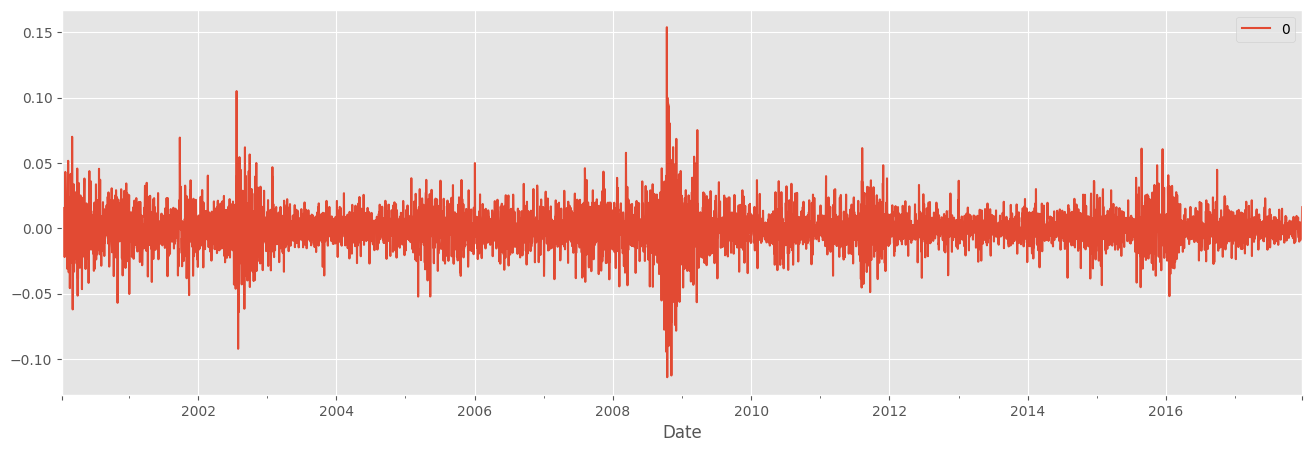

In [76]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

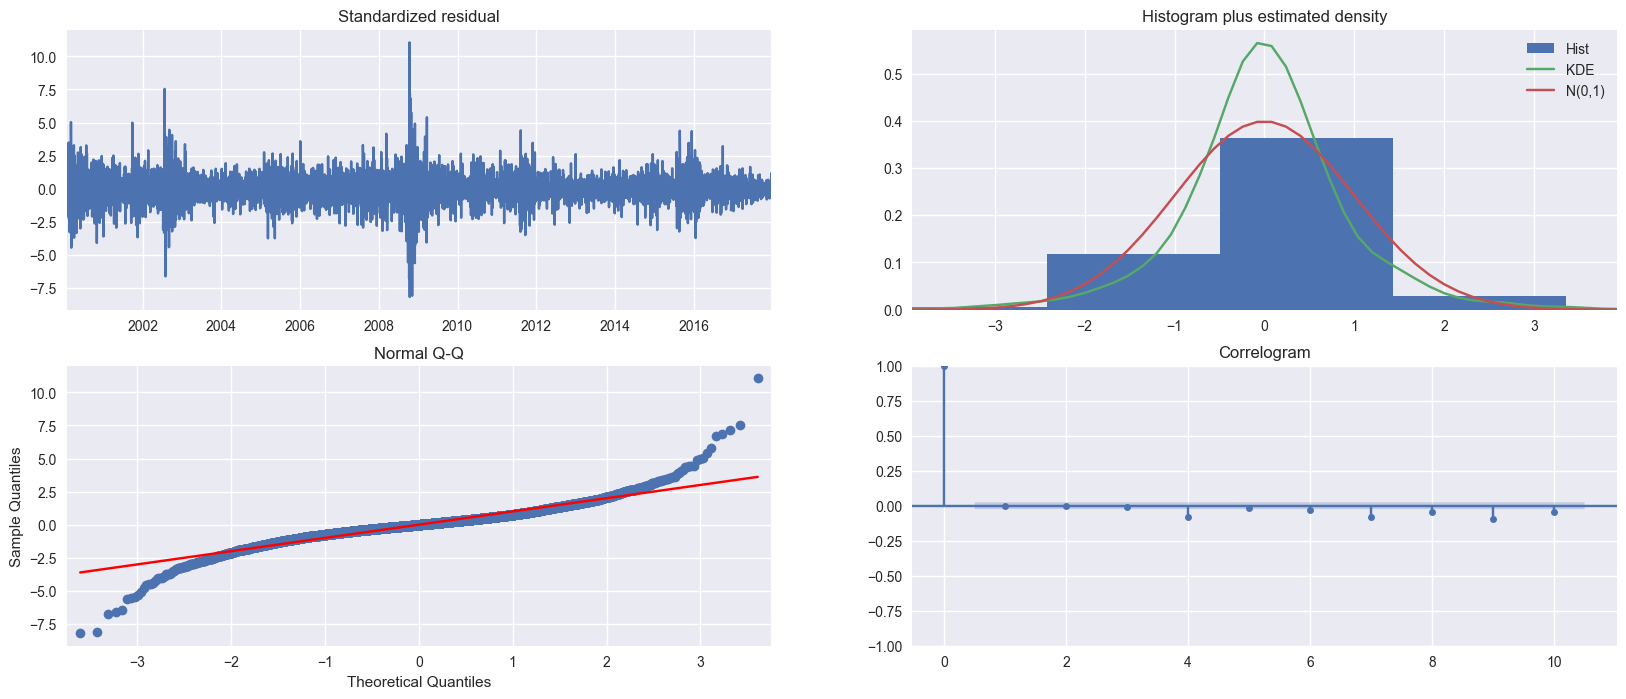

In [77]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [78]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2017-12-22    0.008449
2017-12-23    0.010553
2017-12-24    0.013616
2017-12-25    0.016110
2017-12-26    0.016794
                ...   
2022-06-06    1.107404
2022-06-07    1.104800
2022-06-08    1.102742
2022-06-09    1.105432
2022-06-10    1.109625
Freq: D, Name: ARIMA Predictions, Length: 1632, dtype: float64

In [79]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [80]:
evaluacion_metrica(test_data,arima_pred)


Evaluation metric results:-
MSE is : 0.41319610183599914
MAE is : 0.5604837218121534
RMSE is : 0.6428033150474561
MAPE is : 36981.40231605589
R2 is : -383.96723859739905



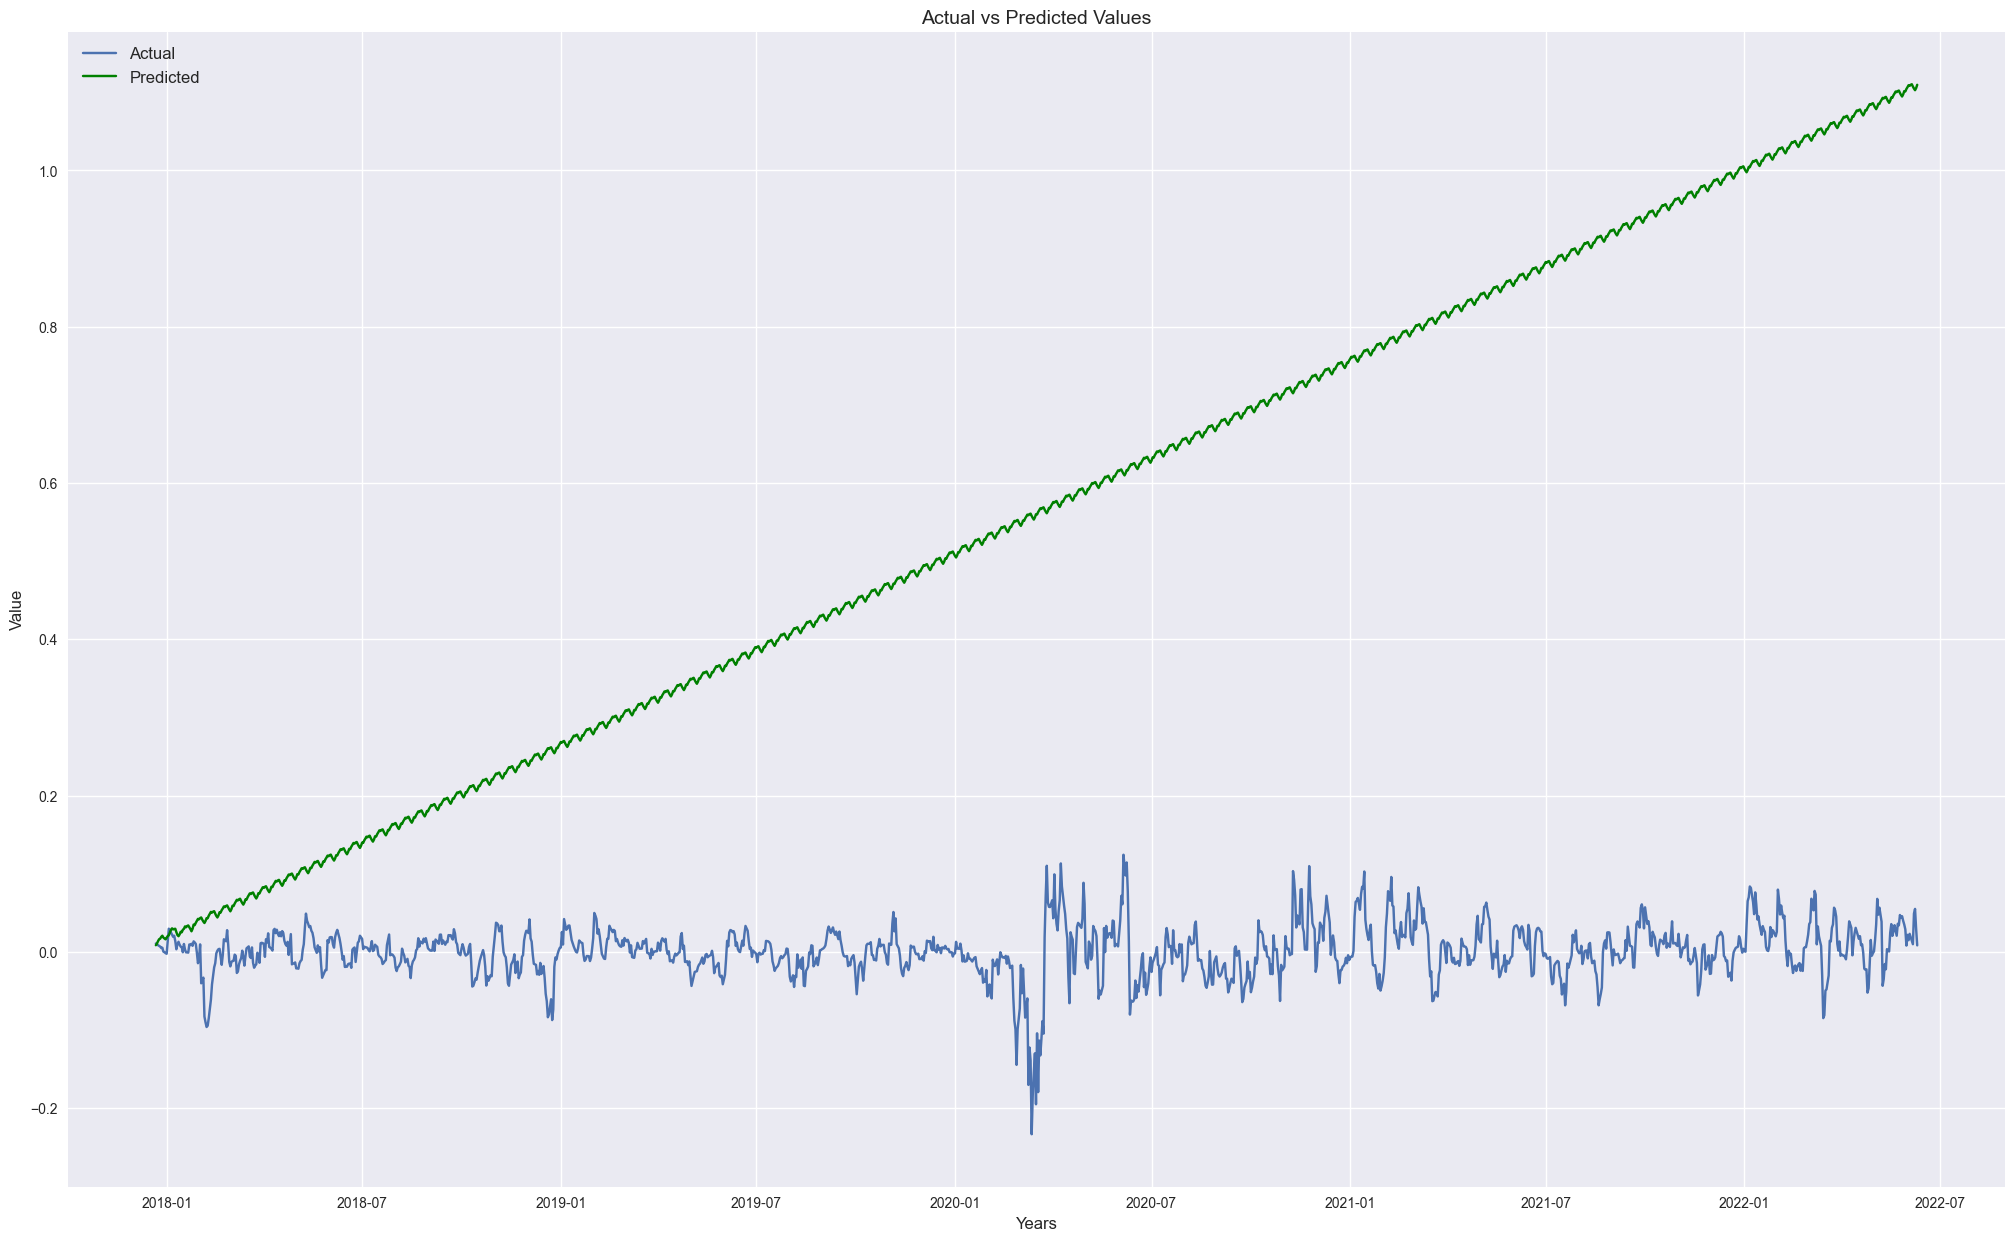

In [81]:
plt.figure(figsize=(25, 15))
plt.plot(test_data, '-', label='Actual')
plt.plot(arima_pred, '-', color='green', label='Predicted')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.title('Actual vs Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.show()